# Python and SQL - Workflow Analysis
Ashish Jakkam


### Q1 - Prepare the Data



##### Import the neccessary Libraries

In [40]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import duckdb as db
import pandas as pd
import warnings
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# pd.set_option('display.width', 200)
# pd.set_option('display.float_format', '{:20,.2f}'.format)
# pd.set_option('display.max_colwidth', None)
warnings.simplefilter(action='ignore', category=FutureWarning)

##### Load the csv files into Pandas dataframes:

In [41]:
df_StpFcEntries = pd.read_excel('Tech_Datasets2024\StpFcEntries.xlsx')
df_contractPaths = pd.read_excel('Tech_Datasets2024\contractPaths.xlsx')
df_WorkflowTaskInfo = pd.read_excel('Tech_Datasets2024\WorkflowTaskInfo.xlsx')

##### View the data:

In [42]:
df_WorkflowTaskInfo.head()

,time_stamp_date,time_stamp_time,status_taken,status_date,status_time,reference_id,body_count,code,description,workflow_id,mode_timeout,category_code,type_code,flow_code,resend,mw_sheet_id,group_id,subprocess_id,xml_ra,xml_lu,xml_lz,xml,reference_id-2,body_reference_id,code-2,input_output,filter_code,lost_data,datasource_code,system_error,body_document_id
0,2012-08-07,1970-01-01 15:06:25,N,2012-08-07,1970-01-01 15:06:25,8586,1,P_COM_FInit-A,P_COM_FInit-A,829,0,Distribution,MX_Completion,META_MX_COM_P,N,1012,0,0,0,390,0,binary data,8586,0,Input,I,8687,N,DIST_ENTRY_SPACE,N,7034
1,2012-08-07,1970-01-01 15:06:25,N,2012-08-07,1970-01-01 15:06:25,8586,1,P_COM_FInit-A,P_COM_FInit-A,829,0,Distribution,MX_Completion,META_MX_COM_P,N,1012,0,0,0,390,0,binary data,8586,1,Output,O,8688,N,DIST_ENTRY_SPACE,N,7035
2,2012-08-07,1970-01-01 15:07:17,N,2012-08-07,1970-01-01 15:07:17,8587,1,P_FXMM_FInit-A_2,P_FXMM_FInit-A_2,829,0,Distribution,MX_Completion,META_MX_CORE_P,N,1113,0,0,0,390,0,binary data,8587,0,Input,I,8689,N,DIST_ENTRY_SPACE,N,7036
3,2012-08-07,1970-01-01 15:07:17,N,2012-08-07,1970-01-01 15:07:17,8587,1,P_FXMM_FInit-A_2,P_FXMM_FInit-A_2,829,0,Distribution,MX_Completion,META_MX_CORE_P,N,1113,0,0,0,390,0,binary data,8587,1,Output,O,8690,N,DIST_ENTRY_SPACE,N,7037
4,2012-08-07,1970-01-01 15:08:03,N,2012-08-07,1970-01-01 15:08:03,8588,1,P_CRD_FInit-A,P_CRD_FInit-A,829,0,Distribution,MX_Completion,META_MX_CRD_P,N,810,0,0,0,390,0,binary data,8588,0,Input,I,8691,N,DIST_ENTRY_SPACE,N,7038


In [43]:
df_contractPaths.head()

,fc_id
0,1164
1,121
2,1433
3,65
4,1699


In [44]:
df_StpFcEntries.head()

,ts_time_long,wait_time,proc_time,status_taken,status_time_long,reference_id,body_count,xmlflow_uid,xmlflow_family_id,xmlflow_status,xmlflow_workflow_id,stp_status,stp_status1,stp_status2,stp_status3,stp_status4,stp_status_path,stp_status_validation_level,job_class_id,job_contact,job_date,job_description,job_description_label,job_time,source_event_class_id,source_event_view,stp_last_validation_date,stp_last_validation_time,stp_last_validator,stp_last_validator_group,stp_udf0,stp_udf1,stp_udf2,stp_udf3,stp_udf4,stp_udf5,stp_udf6,stp_udf7,stp_udf8,stp_udf9,target_class_id,target_date,target_description,target_entity,target_id,target_legal_entity,target_priority,target_processing_entity,target_stream_type,target_time,xmlflow_error_type,xmlflow_request_id,xmlflow_answer_queue_id,xmlflow_answer_queue_param,ctp_hierarchy,ctp_label,ctp_type,fc_cfamily,fc_cgroup,fc_ci_flag,fc_cid,fc_ctype,fc_destination_section,fc_id,fc_trade_purpose,fc_internal_external,fc_last_event_action,fc_last_event_class_id,fc_last_event_id,fc_origin_event_action,fc_origin_event_class_id,fc_origin_id,fc_package_id,fc_package_method,fc_portfolio,fc_portfolio_dst,fc_si_flag,fc_source_section,fc_typology,fc_version,fop_initiator_role,fop_initiator_user,fop_initiator_group,fop_issuer_role,fop_issuer_user,fop_issuer_group,fop_sales,fop_sales_group,fop_trader,fop_trader_group,fop_sales_assistant,fop_sales_assistant_group,fop_trader_assistant,fop_trader_assistant_group,fop_internal_trader,fop_internal_trader_group,fc_maturity_date,fc_shore,stp_doc_status,stp_doc_last_validator,fofoureye,bofoureye,val_mode,total_trials,chasing_trials,last_chasing_date,last_chasing_phase,next_chasing_date,chasing_init,chasing_com,last_manual_chasing_tool,chasing_details
0,1684420000000,5,6,Y,1684420000000,244,0,1533820000000,1,31314,108,,,,,,A,EventPending,,,2023-05-18,Trade Insertion,PendDocUpdate,1970-01-01 16:50:00,,ALL,2023-05-18 00:00:00,1970-01-01 16:50:00,MUREXFO,,,,,,,,,,,,1.238,2016-05-18,"USD/EUR*10000_ S_ EUR_ 1,000,000.00_ 21/11/16 ...",CE,25,MUREX,0,,,1970-01-01 16:50:00,,0,0,,,CRP1[INC](NBIC_NET_CNF_MLTUSDSI),,CURR,OPT,Y,36,ASN,,25,Contract,E,1,,0,1,,25,0,,CM_FXD_VAN,1177,Std,FVTPL,Average Asian FXD,1,PRV,MUREXFO,FO_FXO,PRV,MUREXFO,FO_FXO,,,,,,,,,,,2016-11-17,,,,,,,,,,,,,,,
1,1684420000000,4637,649,Y,1684420000000,1,1,1533820000000,1,31313,108,,,,,,,EventPending,,,2023-05-18,,PendDocUpdate,1970-01-01 16:50:00,,ALL,2023-05-18 16:50:00,2023-05-18 16:50:00,,,,,,,,,,,,,1.526,2016-05-18,"USD/EUR*10000_ B_ EUR_ 1,000,000.00_ 22/08/16 ...",CE,17,1010,0,,,1970-01-01 16:50:00,,0,0,,,CRP1[INC](NBIC_NET_CNF_MLTUSDSI),,CURR,OPT,Y,16,SMP,,17,Contract,E,1,,0,1,,17,0,,CM_FXD_VAN,1177,Std,FVTPL,Straddle FXD,1,PRV,MUREXFO,FO_FXO,PRV,MUREXFO,FO_FXO,,,,,,,,,,,2016-08-18,,,,,,,,,,,,,,,
2,1684420000000,1134,6,Y,1684420000000,20,1,1533820000000,1,31313,108,,,,,,,EventPending,,,2023-05-18,,PendDocUpdate,1970-01-01 16:51:00,,ALL,2023-05-18 16:51:00,2023-05-18 16:51:00,,,,,,,,,,,,,1.238,2016-05-18,"USD/EUR*10000_ S_ EUR_ 1,000,000.00_ 22/08/16 ...",CE,36,1010,0,,,1970-01-01 16:51:00,,0,0,,,CRP1[INC](NBIC_NET_CNF_MLTUSDSI),,CURR,OPT,Y,47,SMP,,36,Contract,E,1,,0,1,,36,0,,CM_FXD_VAN,1177,Std,FVTPL,Vanilla Option FXD,1,PRV,MUREXFO,FO_FXO,PRV,MUREXFO,FO_FXO,,,,,,,,,,,2016-08-18,,,,,,,,,,,,,,,
3,1684420000000,41,396,Y,1684420000000,102,0,1533820000000,1,31314,108,,,,,,A,EventPending,,,2023-05-18,Trade Insertion,PendDocUpdate,1970-01-01 16:50:00,,ALL,2023-05-18 00:00:00,1970-01-01 16:50:00,MUREXFO,,,,,,,,,,,,1.526,2016-05-18,"USD/EUR*10000_ B_ EUR_ 1,000,000.00_ 22/08/16 ...",CE,17,MUREX,0,,,1970-01-01 16:50:00,,0,0,,,CRP1[INC](NBIC_NET_CNF_MLTUSDSI),,CURR,OPT,Y,16,SMP,,17,Contract,E,1,,0,1,,17,0,,CM_FXD_VAN,1177,Std,FVTPL,Straddle FXD,1,PRV,MUREXFO,FO_FXO,PRV,MUREXFO,FO_FXO,,,,,,,,,,,2016-08-18,,,,,,,,,,,,,,,
4,1684420000000,2,11,Y,1684420000000,250,0,1533820000000,1,31188,108,,,,,,,Initial,,,2023-05-18,Trade Insertion,PendDocUpdate,1970-01-01 16:50:00,,ALL,2023-05-18 00:00:00,1970-01-01 16:50:00,MUREXF

##### Clean up the data: Remove outliers such as -1s from data


In [45]:
#Save the original dataframe:
df_StpFcEntries_Original = df_StpFcEntries

# Create a boolean mask where True indicates the row in column 'proc_time' is not -1
mask = (df_StpFcEntries['proc_time'] != -1)

# Apply the mask to the DataFrame
df_StpFcEntries = df_StpFcEntries.loc[mask]


### Q2

#### Summarize the data by Family, Group and Type and output the number of contracts (not entries) that were processed by the contract workflow. 

##### View the relevant columns:

In [46]:
df1 = df_StpFcEntries[['status_taken', 'fc_id', 'fc_cfamily', 'fc_cgroup', 'fc_ctype']]
df1

,status_taken,fc_id,fc_cfamily,fc_cgroup,fc_ctype
0,Y,25,CURR,OPT,ASN
1,Y,17,CURR,OPT,SMP
2,Y,36,CURR,OPT,SMP
3,Y,17,CURR,OPT,SMP
4,Y,25,CURR,OPT,ASN
...,...,...,...,...,...
35019,Y,1781,EQD,EQUIT,
35020,Y,1781,EQD,EQUIT,
35021,Y,1781,EQD,EQUIT,
35022,Y,1781,EQD,EQUIT,


##### Find the entries that have been processed:

In [47]:
df1 = df1[df1['status_taken'].str.contains('Y')]
df1

,status_taken,fc_id,fc_cfamily,fc_cgroup,fc_ctype
0,Y,25,CURR,OPT,ASN
1,Y,17,CURR,OPT,SMP
2,Y,36,CURR,OPT,SMP
3,Y,17,CURR,OPT,SMP
4,Y,25,CURR,OPT,ASN
...,...,...,...,...,...
35019,Y,1781,EQD,EQUIT,
35020,Y,1781,EQD,EQUIT,
35021,Y,1781,EQD,EQUIT,
35022,Y,1781,EQD,EQUIT,


##### Find the unique contract IDs in the dataframe:

In [48]:
unique_contracts = df1['fc_id'].unique()

print(unique_contracts)
print("Number of contracts processed by the contract workflow = ", len(unique_contracts))

[  25   17   36 ... 1671 1672 1752]
Number of contracts processed by the contract workflow =  1678


### Q3

#### Output the following statistics per task:

##### Q3a) Wait-time Average

##### Q3a.1) First make a dataframe with the needed data:

In [49]:
df2 = df_StpFcEntries[['status_taken', 'wait_time', 'xmlflow_status']]
df2 = df2[df2['status_taken'].str.contains('Y')]
df2 = df2[['xmlflow_status', 'wait_time']]
df2

,xmlflow_status,wait_time
0,31314,5
1,31313,4637
2,31313,1134
3,31314,41
4,31188,2
...,...,...
35019,31200,56
35020,31205,5
35021,31210,5
35022,31436,4


##### Q3a.2) Calculate the Average wait time *per task*

In [50]:
df_AverageWaitTimePerTask = df2.groupby('xmlflow_status').mean()
df_AverageWaitTimePerTask = df_AverageWaitTimePerTask.reset_index()
df_AverageWaitTimePerTask = df_AverageWaitTimePerTask.rename(columns={'wait_time': 'Avg_Wait_Time (ms)'})
df_AverageWaitTimePerTask

,xmlflow_status,Avg_Wait_Time (ms)
0,31115,2.321267
1,31118,4.718894
2,31119,2.250000
3,31121,16.387097
4,31122,2.561086
...,...,...
104,31453,16.250000
105,31455,3.142857
106,31457,2.941176
107,31460,5.795455


##### Q3b) Max Wait time *per task*

In [51]:
df_MaxWaitTimePerTask = df2.groupby('xmlflow_status').max()

df_MaxWaitTimePerTask = df_MaxWaitTimePerTask['wait_time']
df_MaxWaitTimePerTask = df_MaxWaitTimePerTask.reset_index()
df_MaxWaitTimePerTask = df_MaxWaitTimePerTask.rename(columns={'wait_time': 'Max_wait_time (ms)'})

df_MaxWaitTimePerTask

,xmlflow_status,Max_wait_time (ms)
0,31115,38
1,31118,339
2,31119,3
3,31121,287
4,31122,48
...,...,...
104,31453,34
105,31455,12
106,31457,20
107,31460,35


##### Q3c) Average Processing Time *per task*

##### Q3c.1) First make a dataframe with the needed data:

In [52]:
df_processingTimes = df_StpFcEntries[['status_taken', 'proc_time', 'xmlflow_status']]
df_processingTimes = df_processingTimes[df_processingTimes['status_taken'].str.contains('Y')]
df_processingTimes = df_processingTimes[['xmlflow_status', 'proc_time']]
df_processingTimes

,xmlflow_status,proc_time
0,31314,6
1,31313,649
2,31313,6
3,31314,396
4,31188,11
...,...,...
35019,31200,2
35020,31205,40
35021,31210,68
35022,31436,1255


##### Q3c.2) Calculate the Average proc time *per task*

In [53]:
df_AverageProcTimePerTask = df_processingTimes.groupby('xmlflow_status').mean()
df_AverageProcTimePerTask = df_AverageProcTimePerTask.reset_index()
df_AverageProcTimePerTask = df_AverageProcTimePerTask.rename(columns={'proc_time': 'Avg_Proc_Time (ms)'})
df_AverageProcTimePerTask

,xmlflow_status,Avg_Proc_Time (ms)
0,31115,1.045249
1,31118,11.377880
2,31119,33.750000
3,31121,12.830645
4,31122,7.185520
...,...,...
104,31453,1.500000
105,31455,5.142857
106,31457,20.029412
107,31460,3.113636


##### Q3d) Processing Time Max

In [54]:
df_MaxProcTimePerTask = df_processingTimes[['xmlflow_status', 'proc_time']]
df_MaxProcTimePerTask = df_MaxProcTimePerTask.groupby('xmlflow_status').max()
df_MaxProcTimePerTask = df_MaxProcTimePerTask.rename(columns={'proc_time': 'max_proc_time (ms)'})
df_MaxProcTimePerTask = df_MaxProcTimePerTask.reset_index()

df_MaxProcTimePerTask

,xmlflow_status,max_proc_time (ms)
0,31115,2
1,31118,33
2,31119,67
3,31121,36
4,31122,177
...,...,...
104,31453,2
105,31455,9
106,31457,30
107,31460,19


##### Q3e) Throughput (per second)

The Throughput(per second) per task was calculated by 1/the average processing time per task 

Frequency = 1/Period

Throughput = 1/Average proc time per task


In [55]:
df_ThroughputPerTask = df_AverageProcTimePerTask[['xmlflow_status', 'Avg_Proc_Time (ms)']].copy()
df_ThroughputPerTask['Throughput (Entries/s)'] = 1/(df_ThroughputPerTask['Avg_Proc_Time (ms)']/1000)

df_ThroughputPerTask

,xmlflow_status,Avg_Proc_Time (ms),Throughput (Entries/s)
0,31115,1.045249,956.709957
1,31118,11.377880,87.889834
2,31119,33.750000,29.629630
3,31121,12.830645,77.938404
4,31122,7.185520,139.168766
...,...,...,...
104,31453,1.500000,666.666667
105,31455,5.142857,194.444444
106,31457,20.029412,49.926579
107,31460,3.113636,321.167883


##### Q3f) Throughput (per minute)

In [56]:
df_ThroughputPerTask_PerMinute = df_ThroughputPerTask
df_ThroughputPerTask_PerMinute[['Avg_Proc_Time (ms)', 'Throughput (Entries/min)']] = df_ThroughputPerTask_PerMinute[['Avg_Proc_Time (ms)', 'Throughput (Entries/s)']]*60
df_ThroughputPerTask_PerMinute[['xmlflow_status', 'Avg_Proc_Time (ms)', 'Throughput (Entries/min)']]


,xmlflow_status,Avg_Proc_Time (ms),Throughput (Entries/min)
0,31115,62.714932,57402.597403
1,31118,682.672811,5273.390036
2,31119,2025.000000,1777.777778
3,31121,769.838710,4676.304211
4,31122,431.131222,8350.125945
...,...,...,...
104,31453,90.000000,40000.000000
105,31455,308.571429,11666.666667
106,31457,1201.764706,2995.594714
107,31460,186.818182,19270.072993


##### Q3g) Latency (per second) - Latency was calculated by summing processing and wait times together.

##### Q3g.1) First make a dataframe with the needed data:

In [57]:
df_Throughput = df_StpFcEntries[['status_taken', 'xmlflow_status', 'wait_time', 'proc_time']]
df_Throughput = df_Throughput[df_Throughput['status_taken'].str.contains('Y')]
df_Throughput = df_Throughput[['xmlflow_status', 'wait_time', 'proc_time']]
df_Throughput

,xmlflow_status,wait_time,proc_time
0,31314,5,6
1,31313,4637,649
2,31313,1134,6
3,31314,41,396
4,31188,2,11
...,...,...,...
35019,31200,56,2
35020,31205,5,40
35021,31210,5,68
35022,31436,4,1255


##### Q3g.2) Combine/Add the Processing and Wait times of entries under the same task.

In [58]:
df_ProcAndWaitTimePerTask = df_Throughput.groupby('xmlflow_status').sum()
df_ProcAndWaitTimePerTask

,wait_time,proc_time
xmlflow_status,,
31115,513,231
31118,1024,2469
31119,9,135
31121,2032,1591
31122,566,1588
...,...,...
31453,65,6
31455,44,72
31457,100,681


##### Q3g.3) Latency (per second) - The Latency of an entry was calculated as the wait time + the processing time as this should account for the time taken between an entry arriving at the input node of a task to when it arrives at the output node


In [59]:
# Add the Wait time and Processing time to get the Latency
df_LatencyPerTask = df_ProcAndWaitTimePerTask['wait_time'] + df_ProcAndWaitTimePerTask['proc_time']
df_LatencyPerTask = df_LatencyPerTask.reset_index()
df_LatencyPerTask = df_LatencyPerTask.rename(columns = {0:'Latency (ms)'})

df_LatencyPerTask['xmlflow_status'] = df_LatencyPerTask['xmlflow_status'].astype(str)
df_LatencyPerTask

,xmlflow_status,Latency (ms)
0,31115,744
1,31118,3493
2,31119,144
3,31121,3623
4,31122,2154
...,...,...
104,31453,71
105,31455,116
106,31457,781
107,31460,392


##### Q4

##### Graphically show how many entries are waiting to be processed by each task in a bar chart. 



In [60]:
df3 = df_StpFcEntries_Original[['xmlflow_status', 'status_taken']]
df3 = df3[df3['status_taken'].str.contains('N')]

df3.insert(2, "Num of Entries", np.ones(df3.shape[0]), True)

print(df3)


df3 = df3.groupby('xmlflow_status').sum()
df3 = df3.drop('status_taken', axis=1)
df3 = df3.reset_index()
df3 = df3.sort_values(by='Num of Entries', ascending=False)


df3

       xmlflow_status status_taken  Num of Entries
38              31199            N             1.0
123             31199            N             1.0
145             31199            N             1.0
148             31199            N             1.0
156             31199            N             1.0
...               ...          ...             ...
35002           31199            N             1.0
35003           31199            N             1.0
35006           31403            N             1.0
35024           31403            N             1.0
35025           31313            N             1.0

[1670 rows x 3 columns]


,xmlflow_status,Num of Entries
1,31199,1139.0
10,31403,288.0
2,31221,140.0
5,31295,40.0
0,31123,27.0
4,31284,11.0
7,31332,10.0
3,31254,5.0
8,31333,5.0
9,31334,3.0


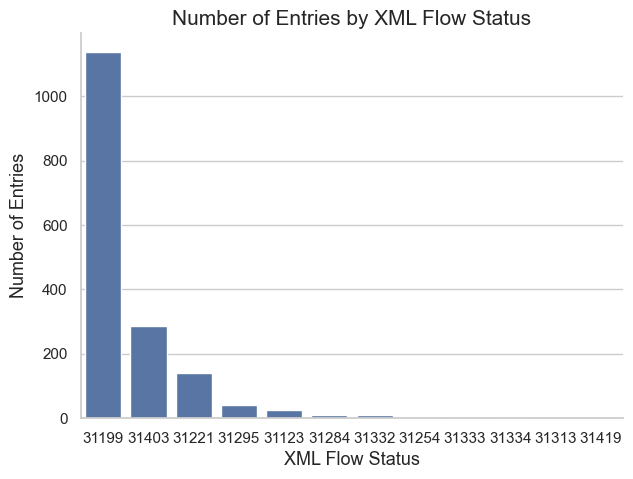

In [61]:
df3['xmlflow_status'] = df3['xmlflow_status'].astype(str)


# # Plot entries waiting to be processed
# sns.barplot(x='Num of Entries', y='xmlflow_status', data=df3, color="b")
# plt.show()


# Set the figure size
fig, ax = plt.subplots(figsize=(7, 5))

# Set the style of the plot
sns.set_theme(style="whitegrid")

# Create the bar plot
bar_plot = sns.barplot(y='Num of Entries', x='xmlflow_status', data=df3, color="b")

# Add a title and labels
plt.title('Number of Entries by XML Flow Status', fontsize=15)
plt.ylabel('Number of Entries', fontsize=13)
plt.xlabel('XML Flow Status', fontsize=13)

# Remove the top and right spines from plot
sns.despine()

# Display the plot
plt.show()

##### Q5

##### Graphically display the top five tasks in terms of processing time in a line graph for the last week. 



In [62]:

df4_1 = df_MaxProcTimePerTask
df4_1 = df4_1.sort_values('max_proc_time (ms)', ascending=False)
df4_1 = df4_1.head(5)
df4_1
print(df4_1)

print()


df4_2 = df_AverageProcTimePerTask
df4_2 = df4_2.sort_values('Avg_Proc_Time (ms)', ascending=False)
df4_2 = df4_2.head(5)
df4_2
print(df4_2)


    xmlflow_status  max_proc_time (ms)
60           31313              111467
24           31180               32187
21           31173               18256
59           31311               17614
15           31157               15969

     xmlflow_status  Avg_Proc_Time (ms)
21            31173         6014.590909
24            31180         3532.000000
100           31424          182.729167
13            31151          181.770642
35            31210          139.268537


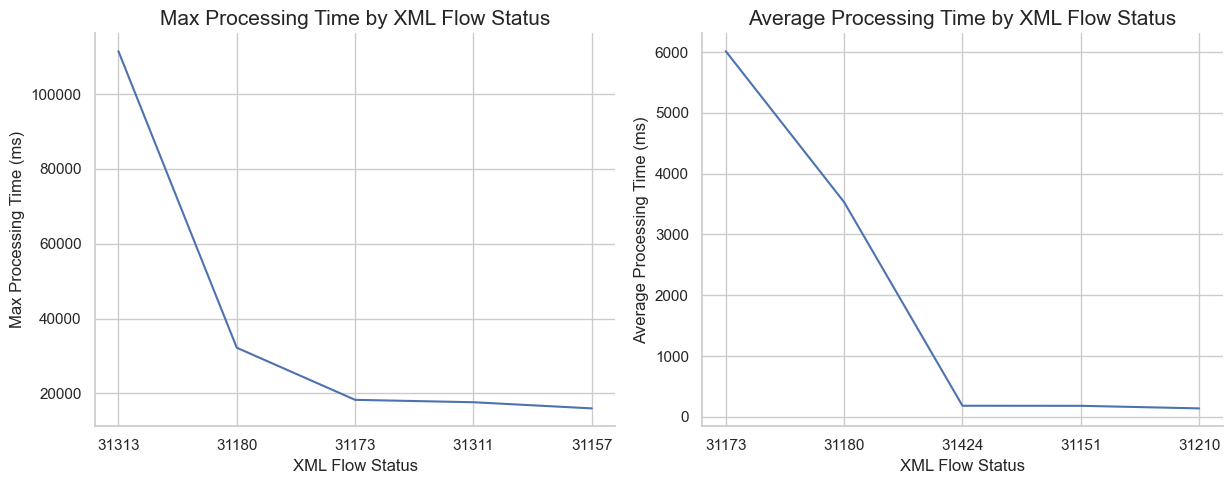

In [63]:

# Set the style of the plot
sns.set_theme(style="whitegrid")

# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12.5, 5))

# Create the first line plot
df4_1['xmlflow_status'] = df4_1['xmlflow_status'].astype(str)
line_plot1 = sns.lineplot(y='max_proc_time (ms)', x='xmlflow_status', data=df4_1, color="b", ax=ax1)

# Add a title and labels to the first plot
ax1.set_title('Max Processing Time by XML Flow Status', fontsize=15)
ax1.set_xlabel('XML Flow Status', fontsize=12)
ax1.set_ylabel('Max Processing Time (ms)', fontsize=12)

# Create the second line plot
df4_2['xmlflow_status'] = df4_2['xmlflow_status'].astype(str)
line_plot2 = sns.lineplot(y='Avg_Proc_Time (ms)', x='xmlflow_status', data=df4_2, color="b", ax=ax2)

# Add a title and labels to the second plot
ax2.set_title('Average Processing Time by XML Flow Status', fontsize=15)
ax2.set_xlabel('XML Flow Status', fontsize=12)
ax2.set_ylabel('Average Processing Time (ms)', fontsize=12)

# Remove the top and right spines from plot
sns.despine()

# Display the plots
plt.tight_layout()
plt.show()

##### Q6

##### Write code to track the path of a contract in the workflow.



In [64]:
df5 = df_StpFcEntries[['ts_time_long', 'status_taken', 'fc_id', 'xmlflow_status', 'fc_cfamily', 'fc_cgroup', 'fc_ctype']]
df5 = df5[df5['status_taken'].str.contains('Y')]
df5 = df5.sort_values('fc_id')
df5 

,ts_time_long,status_taken,fc_id,xmlflow_status,fc_cfamily,fc_cgroup,fc_ctype
100,1684420000000,Y,17,31151,CURR,OPT,SMP
68,1684420000000,Y,17,31185,CURR,OPT,SMP
82,1684420000000,Y,17,31181,CURR,OPT,SMP
36,1684420000000,Y,17,31188,CURR,OPT,SMP
34,1684420000000,Y,17,31261,CURR,OPT,SMP
...,...,...,...,...,...,...,...
35022,1704880000000,Y,1781,31436,EQD,EQUIT,
26667,1704880000000,Y,1781,31311,EQD,EQUIT,
26791,1700830000000,Y,1781,31313,EQD,EQUIT,
35013,1704880000000,Y,1781,31185,EQD,EQUIT,


In [65]:
df_fc_id = pd.read_excel('Tech_Datasets2024\contractPaths.xlsx')
df_fc_id = df_fc_id['fc_id']

# Write the output to the contractPaths_output.txt file:

with open('contractPaths_output.txt', 'w') as file:

    for i in df_fc_id:
        print("")
        print("", file=file)
        selected_rows = df5.loc[df5['fc_id'] == i]
        selected_rows = selected_rows.sort_values('ts_time_long')
        selected_rows
        family = selected_rows.iloc[0]['fc_cfamily']
        group = selected_rows.iloc[0]['fc_cgroup']
        print("Contract", i, "|", family, "|", group, ":", end="")
        print("Contract", i, "|", family, "|", group, ":", end="", file=file)
        for j in selected_rows['xmlflow_status']:
            print(j, end="->")
            print(j, end="->", file=file)

    


Contract 1164 | COM | SPOT :31185->31313->31188->31163->31181->31200->31314->31261->31154->31273->31210->31215->31205->31150->31285->31436->31420->31311->31289->
Contract 121 | CURR | FXD :31313->31210->31147->31215->31289->31122->31314->31261->31138->31311->31118->31188->31115->31163->31154->31436->31126->31185->31144->31328->31354->31391->31324->31399->31385->31200->31150->31205->31273->31421->31232->31285->31430->31141->31424->31181->
Contract 1433 | CURR | OPT :31313->31289->31314->
Contract 65 | IRD | IRS :31273->31215->31188->31157->31154->31181->31311->31313->31185->31289->31314->31163->31151->31261->31285->
Contract 1699 | IRD | IRS :31285->31138->31421->31205->31200->31313->31288->31314->31199->31215->31191->31307->31232->31314->31154->31185->31157->31273->31311->31163->31261->31289->31313->31436->31147->31151->31144->31188->31430->31424->31210->31181->31257->31277->31281->31304->31303->31301->
Contract 1080 | SCF | SCF :31150->31289->31261->31285->31273->31313->31188->31181-

#### Q7) Data Analysis

##### In order to determine the top 3 task types that take the longest in general to process an entry, the average of the processing times for each task type was calculated and top 3 tasks with the highest processing time averages were chosen.

##### Q7a.1) First make a dataframe with the needed data:

In [66]:
df6 = df_StpFcEntries[['status_taken', 'proc_time', 'xmlflow_status', 'fc_ctype']]
df6 = df6[df6['status_taken'].str.contains('Y')]
df6 = df6[['fc_ctype', 'proc_time']]
df6

,fc_ctype,proc_time
0,ASN,6
1,SMP,649
2,SMP,6
3,SMP,396
4,ASN,11
...,...,...
35019,,2
35020,,40
35021,,68
35022,,1255


##### Q7a.2) Calculate the mean processing time per group:

In [67]:
df6 = df6.groupby('fc_ctype').mean()
df6 = df6.reset_index()
df6 = df6.sort_values('proc_time', ascending=False)
df6


,fc_ctype,proc_time
7,FWD,1120.071429
16,SMPS,282.083333
3,BAR,121.209184
15,SMP,76.178366
8,FXD,54.540694
0,,26.200801
2,ASN,12.766667
4,BAR2,9.466667
13,REPO,8.297980
5,BSK,8.076923


C:\Users\AshishJakkam\AppData\Local\Temp\ipykernel_51384\262224244.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['fc_ctype'] = df6['fc_ctype'].astype(str)


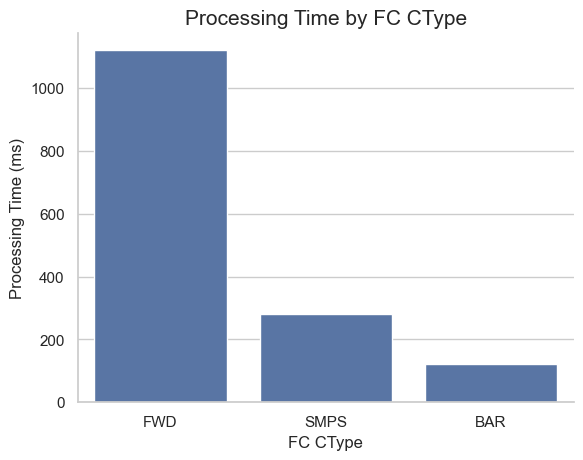

In [68]:
df6 = df6.head(3)
df6['fc_ctype'] = df6['fc_ctype'].astype(str)


# Set the style of the plot
sns.set_theme(style="whitegrid")

# Create the bar plot
bar_plot = sns.barplot(y='proc_time', x='fc_ctype', data=df6, color="b")

# Add a title and labels
plt.title('Processing Time by FC CType', fontsize=15)
plt.xlabel('FC CType', fontsize=12)
plt.ylabel('Processing Time (ms)', fontsize=12)

# Remove the top and right spines from plot
sns.despine()

# Display the plot
plt.show()

##### Q7b) Are there any tasks with bottlenecks?

Yes as there are many entries with status_taken field as 'N'. This means that we need to count the number of 'N's per task to see the number of entries backlogged per task.
Assumption: The term "bottlenecks" refers to the amount of entries backlogged per task.

In [69]:
df7 = df_StpFcEntries_Original[['xmlflow_status', 'status_taken']]
df7 = df7[df7['status_taken'].str.contains('N')]

# Using DataFrame.insert() to add a column
df7.insert(2, "Num of Entries Waiting", np.ones(df7.shape[0]), True)

df7 = df7[['xmlflow_status', 'Num of Entries Waiting']]

df7 = df7.groupby('xmlflow_status').sum()
df7 = df7.sort_values('Num of Entries Waiting', ascending=False)

df7

,Num of Entries Waiting
xmlflow_status,
31199,1139.0
31403,288.0
31221,140.0
31295,40.0
31123,27.0
31284,11.0
31332,10.0
31254,5.0
31333,5.0


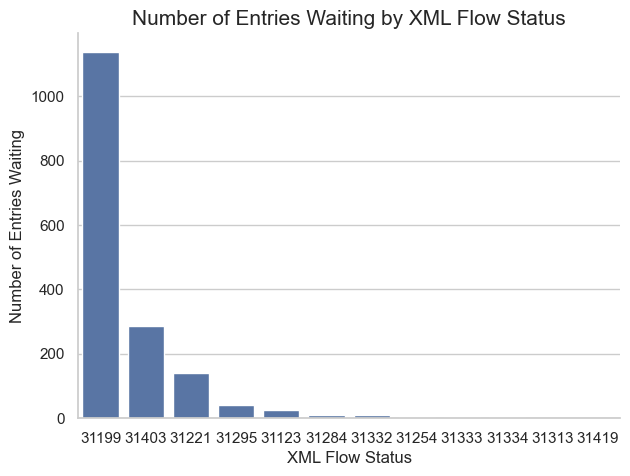

In [70]:
df7 = df7.reset_index()
df7['xmlflow_status'] = df7['xmlflow_status'].astype(str)
df7

# Set the figure size
fig, ax = plt.subplots(figsize=(7, 5))

# Set the style of the plot
sns.set_theme(style="whitegrid")

# Create the bar plot
bar_plot = sns.barplot(y='Num of Entries Waiting', x='xmlflow_status', data=df7, color="b")

# Add a title and labels
plt.title('Number of Entries Waiting by XML Flow Status', fontsize=15)
plt.xlabel('XML Flow Status', fontsize=12)
plt.ylabel('Number of Entries Waiting', fontsize=12)

# Remove the top and right spines from plot
sns.despine()

# Display the plot
plt.show()

##### Q7c) Assume that the traders want to increase the volumes of FX Spot trades – the goal is to process 100 000 trades using a batch upload. 

##### Q7ci) Estimate how long it might take to process all the trades in the workflow

##### Step 1: First a dataframe was created that provides a list of all the processed entries in the taskflow that have a fc_cgroup of FXD and fc_typology of 'Spot'. These entries were assumed to be the entries belonging to FX Spot trades.

In [71]:
df8 = df_StpFcEntries[['fc_id', 'proc_time', 'status_taken', 'fc_cfamily', 'fc_cgroup', 'fc_typology']]
df8 = df8[df8['status_taken'].str.contains('Y')]
df8 = df8[df8['fc_cgroup'].str.contains('FXD')]
df8 = df8[df8['fc_typology'].str.contains('Spot')]
df8

,fc_id,proc_time,status_taken,fc_cfamily,fc_cgroup,fc_typology
937,115,4,Y,CURR,FXD,Spot
945,115,6,Y,CURR,FXD,Spot
950,116,5,Y,CURR,FXD,Spot
955,117,6,Y,CURR,FXD,Spot
960,115,4,Y,CURR,FXD,Spot
...,...,...,...,...,...,...
34479,1683,1,Y,CURR,FXD,Spot
34480,1683,1,Y,CURR,FXD,Spot
34481,1683,5,Y,CURR,FXD,Spot
34487,1683,5,Y,CURR,FXD,Spot


##### Step 2: Calculate the the total processing time per contract by adding the processing times of all entries with the same fc_id together. This should provide us with the total processing time per contract.

In [72]:
df8 = df8[['fc_id', 'proc_time']]
df8 = df8.groupby('fc_id').sum()
df8 = df8.reset_index()
df8

,fc_id,proc_time
0,115,137
1,116,106
2,117,92
3,118,95
4,119,97
...,...,...
74,1682,380
75,1683,866
76,1706,153
77,1741,14956


##### Step 2: View the distribution of the data to look for outliers

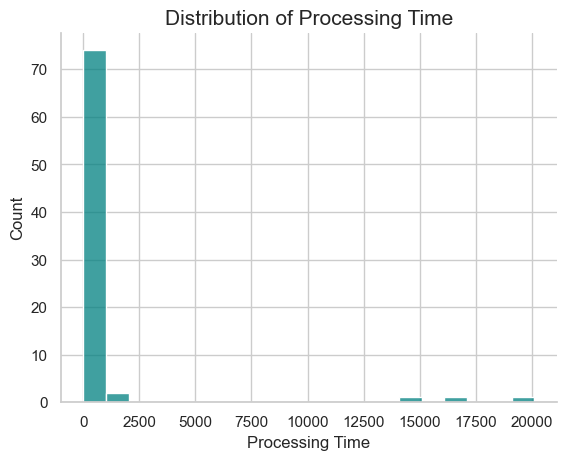

In [73]:
# Set the style of the plot to a professional theme
sns.set_theme(style="whitegrid")

# Create the histogram
histplot = sns.histplot(x='proc_time', data=df8, bins=20, color='teal')

# Set the title of the plot
histplot.set_title('Distribution of Processing Time', fontsize=15)

# Set the label of the x axis
histplot.set_xlabel('Processing Time', fontsize=12)

# Remove the top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.show()

##### Step 3: There are some outlying trades that have a proccessing time larger than 2500ms that will significantly affect the average, therefore exclude trades with processing times larger than 2500 ms

    fc_id  proc_time
0     115        137
1     116        106
2     117         92
3     118         95
4     119         97
..    ...        ...
73   1681        337
74   1682        380
75   1683        866
76   1706        153
78   1744        334

[76 rows x 2 columns]


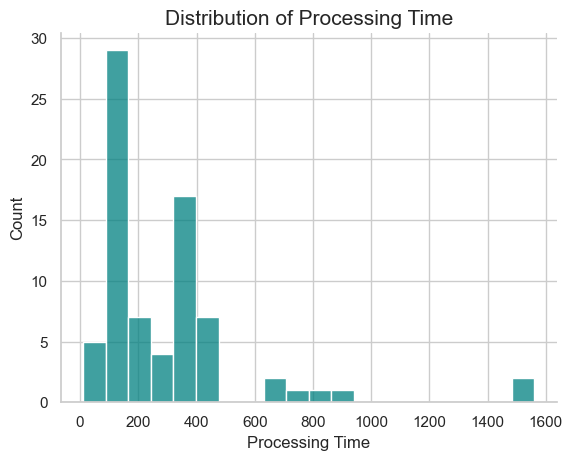

In [74]:
# Create a boolean mask where True indicates the row in column 'proc_time' is not -1
mask = (df8['proc_time'] < 2500)

# Apply the mask to the DataFrame
df8 = df8.loc[mask]

print(df8)



# Set the style of the plot to a professional theme
sns.set_theme(style="whitegrid")

# Create the histogram
histplot = sns.histplot(x='proc_time', data=df8, bins=20, color='teal')

# Set the title of the plot
histplot.set_title('Distribution of Processing Time', fontsize=15)

# Set the label of the x axis
histplot.set_xlabel('Processing Time', fontsize=12)

# Remove the top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.show()


##### Calculate the mean processing time of all the trades

In [75]:
df8 = df8[['proc_time']]
avgProcTime = df8.mean().values[0]
print("Average processing time for 1 trade = ", avgProcTime, "ms")
print("Average processing time for 100000 trades = ", avgProcTime*100000/1000, "seconds")

Average processing time for 1 trade =  286.9342105263158 ms
Average processing time for 100000 trades =  28693.42105263158 seconds


##### Q7cii) Explain which predictive techniques you used to predict the total processing time and how you would implement this in theory. 

A pure averaging method was used to calculate the average processing time of each trade. This method therefore makes the assumption that all the trades take roughly the same amount of time to be processed and also assumes that that all the different 'types'/'variations' of trades occur with the same frequency and does not take account of the possibiliy that some types of FX Spot trades might occur more frequently than others and thus would have an impact on the overall processing time.

An alternative approach would be to use a Nerual Network to perfrom regression to predict the processing time of each entry and by extension each trade by using the other columns in the csv file as inputs. 

#### Q8 - SQL Code 
###### (SQL code tested and ran successfully in the Murex database environment using SQuirreL SQL Client)

##### Q8a) Summarize the data by Family, Group and Type and output the number of contracts (not entries) that were processed by the contract workflow.

In [ ]:
SELECT DISTINCT FC_ID, STATUS_TAKEN, FC_CFAMILY, FC_CGROUP, FC_CTYPE 
FROM STPFC_ENTRY_TABLE 
WHERE STATUS_TAKEN = 'Y'

##### Q8bi) Processing Time Average

In [ ]:
-- Q8Bi) Processing Time Average
SELECT XMLFLOW_STATUS, AVG(PROC_TIME) AS 'Average Processing Time'
FROM  STPFC_ENTRY_TABLE 
WHERE STATUS_TAKEN = 'Y' AND WAIT_TIME != -1
GROUP BY XMLFLOW_STATUS

##### Q8bii) Processing Time Max

In [ ]:
-- Q8bii) Processing Time Max
SELECT XMLFLOW_STATUS, MAX(PROC_TIME) AS 'Max Processing Time'
FROM  STPFC_ENTRY_TABLE 
WHERE STATUS_TAKEN = 'Y' AND WAIT_TIME != -1
GROUP BY XMLFLOW_STATUS

##### Q8biii) Processing Time Min

In [ ]:
-- Q8biii) Processing Time Min
SELECT XMLFLOW_STATUS, MIN(PROC_TIME) AS 'Min Processing Time'
FROM  STPFC_ENTRY_TABLE 
WHERE STATUS_TAKEN = 'Y' AND WAIT_TIME != -1
GROUP BY XMLFLOW_STATUS

##### Q8b iv) Throughput (per second)

In [ ]:
-- Q8biv) Throughput (per second)
SELECT XMLFLOW_STATUS, 1/(AVG(PROC_TIME)/1000) AS 'Throughput (per second)'
FROM  STPFC_ENTRY_TABLE 
WHERE STATUS_TAKEN = 'Y' AND WAIT_TIME != -1
GROUP BY XMLFLOW_STATUS